In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ml-100k.csv')
df.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
len(df['rating'])

100000

In [4]:
# load data
data = list(zip(df['userId'], df['movieId'], df['rating']))

np.random.shuffle(data)
bg = df['rating'][: int(len(data)*0.8)].mean()
train = data[0: int(len(data)*0.8)]
test = data[len(train):]
n_users = df['userId'].max()
n_items = df['movieId'].max()

In [5]:
def MSE(U,V,bi,bu,bg,test):
    mse = 0.0
    for t in test:
        u = t[0]-1
        i = t[1]-1
        r = t[2]
        r_hat = bg + bu[u] + bi[i] + np.dot(U[u],V[i].T)
        mse += (r-r_hat)**2
    mse = mse/len(test)
    return mse

In [6]:
def MAE(U,V,bi,bu,bg,test):
    mae = 0.0
    for t in test:
        u = t[0]-1
        i = t[1]-1
        r = t[2]
        r_hat = bg + bu[u] + bi[i] + np.dot(U[u],V[i].T)
        mae += abs(r-r_hat)
    mae /= len(test)
    return mae

In [7]:
# train: train data
# test: test data
# n_users:the number of users
# n_items:the number of items
# K: the number of latent factor
# eta: the learning rate
# reg: regularization parameters
# bi, bu, bg: bias for items, users and global
# iterations: the max iteration
start = time()
K = 100
iterations = 40
eta = 0.005 # learning rate
reg = 0.01

U = np.random.normal(scale=3./K,size=(n_users, K))
V = np.random.normal(scale=3./K,size=(n_items, K))
bi = np.zeros(n_items)   # items bias
bu = np.zeros(n_users)    # users bias
L = 1000.0

mae=[]
mse=[]
loss=[]
step = 0
while step < iterations:
    step += 1
    l=0.0
    for dat in train:
        u = dat[0]-1
        i = dat[1]-1
        r = dat[2]

        r_hat = bg + bu[u] + bi[i] + np.dot(U[u],V[i].T) 
        e = r - r_hat 
        l += e**2 + reg * (bi[i]**2 + bu[u]**2 + np.square(U[u]).sum() + np.square(V[i]).sum())

        bu[u] += eta * (e - reg * bu[u])
        bi[i] += eta * (e - reg * bi[i])
        U[u] += eta * (e * V[i] - reg * U[u])
        V[i] += eta * (e * U[u] - reg * V[i])


    loss.append(l)
    mse.append(MSE(U,V,bi,bu,bg,test))
    m = MAE(U,V,bi,bu,bg,test)
    
    if len(mae)!=0 and mae[-1]<m: break
    mae.append(m)
    if step%10==0: print(step)
    
    step+=1
print(time()-start)

73.52295017242432


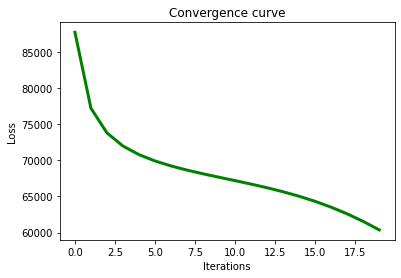

In [8]:
fig1 = plt.figure('LOSS')
x = range(len(loss))
plt.plot(x, loss, color='g',linewidth=3)
plt.title('Convergence curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

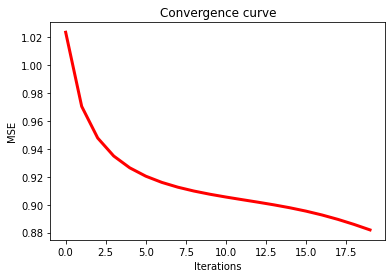

In [9]:
fig2 = plt.figure('MSE')
x = range(len(mse))
plt.plot(x, mse, color='r',linewidth=3)
plt.title('Convergence curve')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

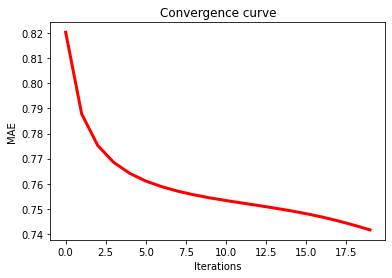

In [10]:
fig3 = plt.figure('MAE')
x = range(len(mae))
plt.plot(x, mae, color='r',linewidth=3)
plt.title('Convergence curve')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.show()

In [11]:
print('MSE:', mse[-1])
print('MAE:', mae[-1])

MSE: 0.8819615049765933
MAE: 0.7416024350394591
